### CLASIFICACIÓN DE USUARIOS EN BANCO PARA CAMPAÑA DE MARKETING:

A partir de una base de datos de 45212 clientes y conociendo 17 variables tanto a nivel personal como de comportamiento, es que se busca componer un grupo de los 300 potenciales clientes que puedan adquirir un nuevo producto premium.  

   **#bank client data:**
   
   
   1 - age (numeric)
   
   2 - job : type of job 
   
   3 - marital : marital status 
   
   
   4 - education 
   
   
   5 - default: has credit in default?
   
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   
   7 - housing: has housing loan? 
   
   
   8 - loan: has personal loan? 
   
   
   **#related with the last contact of the current campaign:**
   
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
   
  10 - day: last contact day of the month (numeric)
  
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  
  12 - duration: last contact duration, in seconds (numeric)
  
  
   **#other attributes:**
   
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/Heber/Desktop/CLASES II SEMESTRE 2019/IET 2019/bank.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df["balance"].describe().transpose()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

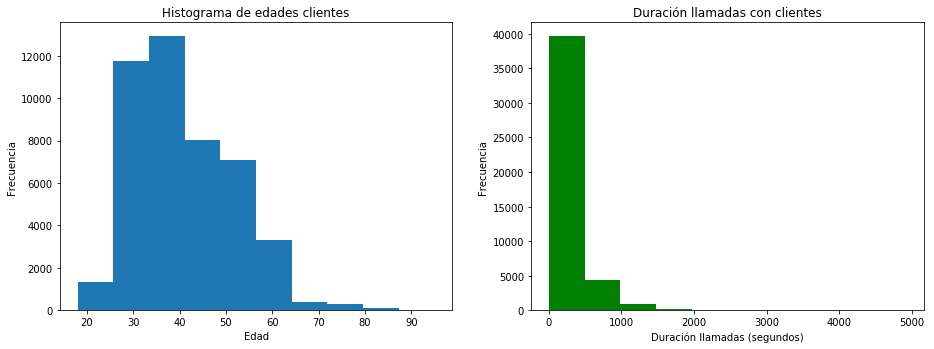

In [4]:
plt.subplot(121)
plt.hist(df["age"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de edades clientes")
plt.subplot(122)
plt.hist(df["duration"], color="g")
plt.xlabel("Duración llamadas (segundos)")
plt.ylabel("Frecuencia")
plt.title("Duración llamadas con clientes")
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0.2, hspace=0.2)
plt.show()

In [5]:
df.groupby(["education"]).count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [6]:
variables = ["age", "balance", "duration", "education"]
df2 = df[variables]
df2.head()

,age,balance,duration,education
0,58,2143,261,tertiary
1,44,29,151,secondary
2,33,2,76,secondary
3,47,1506,92,unknown
4,33,1,198,unknown


In [7]:
df3 = df2[(df2["age"]<30)  & (df2["duration"]>240) & (df2["education"]=="tertiary") & (df2["balance"]>1000)]

In [24]:
df3.count()

age          219
balance      219
duration     219
education    219
dtype: int64

In [25]:
df3.head()

,age,balance,duration,education
1046,23,2605,278,tertiary
1750,28,2269,331,tertiary
1825,29,5406,530,tertiary
2234,27,2420,391,tertiary
3029,29,1952,354,tertiary


**Clasificación en base a 4 variables de entrada:**

In [21]:
x_age = float(input("Edad máxima:"))
x_balance= float(input("Saldo anual mínimo:"))
x_duration = float(input("Duración promedio llamadas:"))
x_education = str(input("Nivel educacional:"))

df4 = df4 = df2[(df2["age"]<x_age)  & (df2["duration"]>x_duration) & (df2["education"]==x_education) & (df2["balance"]>x_balance)]

save = df4.to_excel("C:/Users/Heber/Desktop/CLASES II SEMESTRE 2019/IET 2019/marketing_1.xlsx")

print("Su clasificación se realizo con exito y se ha guardado satisfactoriamente")

Edad máxima:22
Saldo anual mínimo:1200
Duración promedio llamadas:120
Nivel educacional:tertiary
Su clasificación se realizo con exito y se ha guardado satisfactoriamente
